## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(mouse_study.iloc[:,0].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'], keep = 'first')]
duplicate_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_study.loc[mouse_study['Mouse ID'] != 'g989']
clean_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_mouse.iloc[:,0].unique())
num_mice_clean 

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group = clean_mouse.groupby('Drug Regimen')
tumor_mean = drug_group['Tumor Volume (mm3)'].mean()
tumor_median = drug_group['Tumor Volume (mm3)'].median()
tumor_var = drug_group['Tumor Volume (mm3)'].var()
tumor_std = drug_group['Tumor Volume (mm3)'].std()
tumor_sem = drug_group['Tumor Volume (mm3)'].sem()
tumor_summary = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var, 'Standard Deviation': tumor_std, 'SEM': tumor_sem})
tumor_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg_summary = drug_group['Tumor Volume (mm3)'].agg(['mean', 'median', np.var, np.std, st.sem])
tumor_agg_summary = tumor_agg_summary.rename(columns= {'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
tumor_agg_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurement Taken')

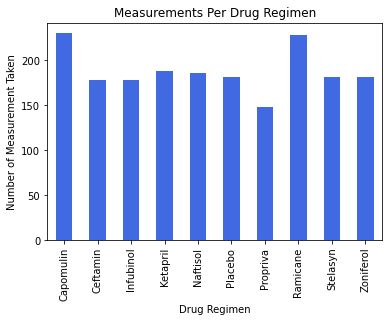

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
tumor_meas = drug_group['Tumor Volume (mm3)'].count()
tumor_meas_chart = tumor_meas.plot(kind = 'bar', title = 'Measurements Per Drug Regimen', color = 'royalblue')
tumor_meas_chart.set_xlabel('Drug Regimen')
tumor_meas_chart.set_ylabel('Number of Measurement Taken')


Text(0, 0.5, 'Number of Measurement Taken')

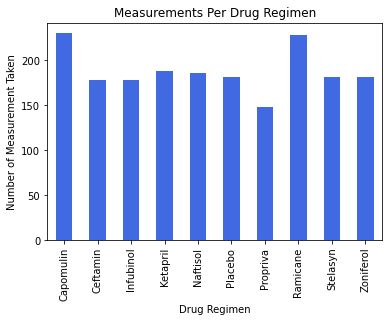

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
tumor_meas = drug_group['Tumor Volume (mm3)'].count()
labels = clean_mouse['Drug Regimen'].unique()
x_axis = np.arange(len(clean_mouse['Drug Regimen'].unique()))
plt.bar(x_axis, tumor_meas, width = 0.5, color = 'royalblue')
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, sorted(labels), rotation = 90)
plt.xlim(-0.5, len(x_axis)-0.5) 
plt.title('Measurements Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurement Taken')

<AxesSubplot:title={'center':'Distribution of Mice by Sex'}, ylabel='Percent of Total Mice in Study'>

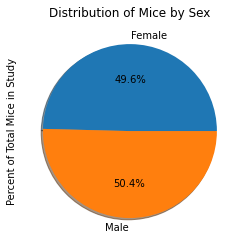

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_once = clean_mouse.drop_duplicates("Mouse ID")
mouse_gender = mouse_once.groupby("Sex")
gender_count = mouse_gender["Mouse ID"].count()
gender_count.plot(kind = "pie", title = "Distribution of Mice by Sex", ylabel = "Percent of Total Mice in Study", autopct="%1.1f%%", shadow=True)

Text(0, 0.5, 'Percent of Total Mice in Study')

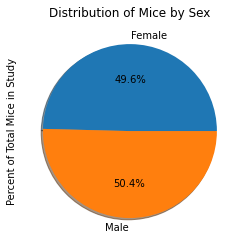

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_once['Sex'].unique()
plt.pie(gender_count, labels = sorted(labels), autopct="%1.1f%%", shadow=True)
plt.title("Distribution of Mice by Sex")
plt.ylabel("Percent of Total Mice in Study")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_mouse = clean_mouse.sort_values("Timepoint")
last_tpt_mice = sorted_mouse.drop_duplicates("Mouse ID", keep = 'last')
last_tpt_mice = last_tpt_mice[['Mouse ID', 'Drug Regimen', 'Timepoint']]
last_tpt_mice.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol = last_tpt_mice.merge(study_results)
final_tumor_vol.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,n482,Propriva,0,45.0,0
1,l872,Placebo,0,45.0,0
2,o848,Stelasyn,0,45.0,0
3,t573,Ceftamin,0,45.0,0
4,f932,Ketapril,0,45.0,0


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_vol_df = pd.DataFrame({})
for treatment in treatments:
# Create empty list to fill with tumor vol data (for plotting)
    tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    for row in final_tumor_vol:
    # Locate the rows which contain mice on each drug and get the tumor volumes
        if final_tumor_vol.loc[final_tumor_vol[row, 'Drug Regimen'] == treatment:
            tumor_vol_data.append(final_tumor_vol['Tumor Volume (mm3)'])
    # add subset 
    tumor_vol_data
    
    # Determine outliers using upper and lower bounds
    

SyntaxError: invalid syntax (<ipython-input-19-4a6a1e6bda49>, line 14)

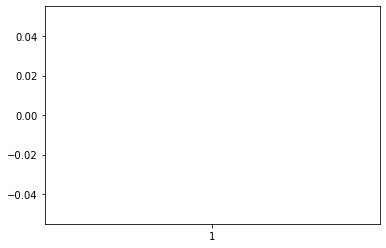

In [111]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(drug_vol_df)
plt.show()

## Line and Scatter Plots

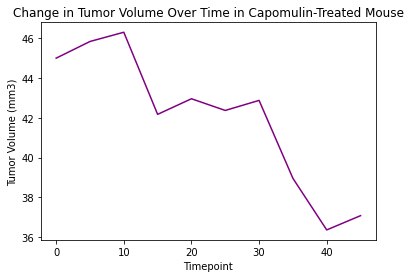

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = clean_mouse.loc[clean_mouse['Mouse ID'] == 'g288', :]
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], color = 'purple')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Change in Tumor Volume Over Time in Capomulin-Treated Mouse")
plt.show()

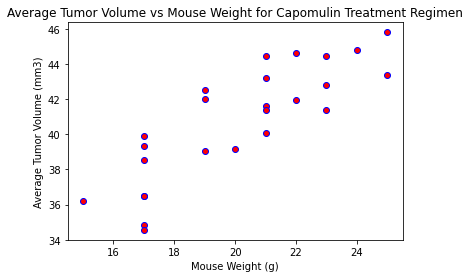

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_mouse.loc[clean_mouse['Drug Regimen'] == 'Capomulin', :]
capomulin_group = capomulin_df.groupby('Mouse ID')
capomulin_df.head()
plt.scatter(capomulin_group['Weight (g)'].mean(), capomulin_group['Tumor Volume (mm3)'].mean(), marker = "o", facecolors= "red", edgecolors="blue")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Treatment Regimen")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.8419363424694717


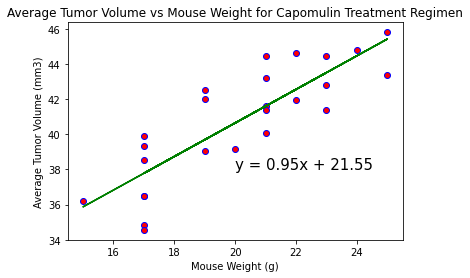

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume is {st.pearsonr(capomulin_group['Weight (g)'].mean(), capomulin_group['Tumor Volume (mm3)'].mean())[0]}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_group['Weight (g)'].mean(), capomulin_group['Tumor Volume (mm3)'].mean())
regress_values = capomulin_group['Weight (g)'].mean() * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_group['Weight (g)'].mean(), capomulin_group['Tumor Volume (mm3)'].mean(), marker = "o", facecolors= "red", edgecolors="blue")
plt.plot(capomulin_group['Weight (g)'].mean(),regress_values,"g-")
plt.annotate(line_eq,(20,38),fontsize=15,color="black")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Treatment Regimen")
plt.show()